# Customer shopping trends


The aim of the project is to identify frequent and non-frequent buyers and provide recommendations for increased sales.  
Key features of the data are transaction details, customer information and shopping behaviour. 

Data source: Data set from Kaggle (https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset/data)

This project was done in Python, to be added to my project portfolio. 

In [177]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [178]:
# Import the csv file taking the first column as index

file_path = 'C:/Iresha_Code/Python_demo_project/Data/shopping_trends.csv'
data = pd.read_csv(file_path)

# Create a pandas dataframe
df = pd.DataFrame(data)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Explore data

### Full data frame

In [179]:
# Check data types
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [180]:
# shape of df
df.shape

(3900, 19)

In [181]:
# check for missing values
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [182]:
# Check statistics of numeric fields, with no decimal places
summary = df.describe().round(0).astype(int)
summary

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900,3900,3900,3900,3900
mean,1950,44,60,4,25
std,1126,15,24,1,14
min,1,18,20,2,1
25%,976,31,39,3,13
50%,1950,44,60,4,25
75%,2925,57,81,4,38
max,3900,70,100,5,50


### Customer ID

In [183]:
df['Customer ID'].nunique()

3900

This means that this can be considered as the primary key.

### Age
From summary table, key statistics like min, max, mean are known.

### Gender

In [184]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [185]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

### Item Purchased

In [186]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [187]:
df['Item Purchased'].nunique()

25

### Category

In [188]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [189]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

### Purchase Amount
From summary table, key statistics like min, max, mean are known. 

### Location

In [190]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [191]:
df['Location'].nunique()

50

In [192]:
df['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

### Size

In [193]:
df['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [194]:
df['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

### Color

In [195]:
df['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [196]:
df['Color'].nunique()

25

In [197]:
df['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

### Season

In [198]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [199]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

### Review Rating
From summary table, key statistics like min, max, mean are known.

### Subscription Status

In [200]:
df['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

In [201]:
df['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

### Payment Method

In [202]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [203]:
df['Payment Method'].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

### Shipping Type

In [204]:
df['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [205]:
df['Shipping Type'].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

### Discount Applied

In [206]:
df['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

### Promo Code Used

In [207]:
df['Promo Code Used'].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

### Previous Purchases
From summary table, key statistics like min, max, mean are known.

### Preferred Payment Method 

In [208]:
df['Preferred Payment Method'].nunique()

6

In [209]:
df['Preferred Payment Method'].value_counts()

Preferred Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

### Frequency of Purchases

In [210]:
df['Frequency of Purchases'].nunique()

7

In [211]:
df['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

## Analysis - Customer Segmentation 
Segmenting customers based on:
- Demographics: Age, Gender, and Location.
- Behavior: Number of previous purchases, frequency, subscription status.
- Purchase Patterns: Categories, seasons, and items purchased.

### 1. Define segmentation criteria
We can use the following variables for segmentation:
- Demographics: Age, Gender, Location.
- Behavior: Number of previous purchases, frequency of purchases.
- Subscription Status: Subscribed or not.
- Purchase Data: Average purchase amount, category of item.

### 2. Data preparation

In [212]:
# Select features for segmentation
features = df[['Age', 'Previous Purchases','Purchase Amount (USD)']]
features

,Age,Previous Purchases,Purchase Amount (USD)
0,55,14,53
1,19,2,64
2,50,23,73
3,21,49,90
4,45,31,49
...,...,...,...
3895,40,32,28
3896,52,41,49
3897,46,24,33
3898,44,24,77


In [213]:
# Standardize the numerical features before clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.71891344, -0.78583067, -0.28562864],
       [-1.64862924, -1.61655226,  0.17885219],
       [ 0.39008807, -0.16278948,  0.55888195],
       ...,
       [ 0.12702777, -0.09356268, -1.13013923],
       [-0.00450238, -0.09356268,  0.72778407],
       [ 0.52161822,  0.52947851,  0.89668619]])

### 3. Apply Clustering Algorithm
Use K-Means clustering algorithm to group customers.

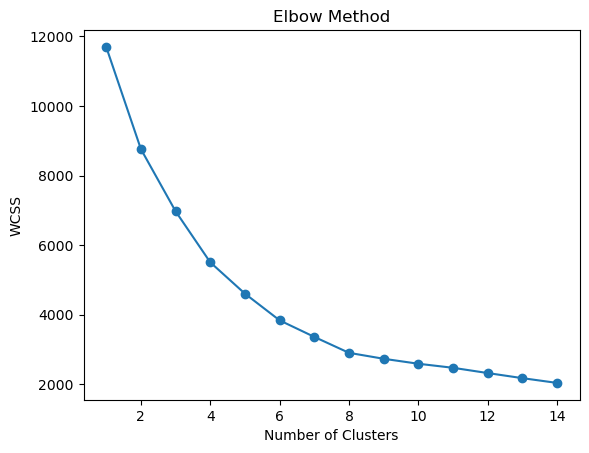

In [214]:
# Determine the optimal number of clusters using the elbow method:

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [215]:
# Apply K-Means clustering:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters based on elbow method
df['Cluster'] = kmeans.fit_predict(features_scaled)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,0


### 4. Analyze Clusters
#### Centriods

In [216]:
# Centroids: Understand the average profile of each group,
cluster_summary = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(cluster_summary)

        Age  Previous Purchases  Purchase Amount (USD)
0  1.029503            0.213382              -0.049967
1 -0.509767           -0.989345              -0.004288
2 -0.759840            0.856911               0.070203


In [217]:
unscaled_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled_centroids

array([[59.72271186, 28.43389831, 58.58101695],
       [36.31712963, 11.06018519, 59.66280864],
       [32.5146147 , 37.72984942, 61.42692648]])

#### Group analysis

In [218]:
# Group Analysis: Analyze other columns within each cluster
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster}")
    print(df[df['Cluster'] == cluster].describe())

Cluster 0
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  1478.000000  1478.000000            1478.000000    1478.000000   
mean   1926.399865    59.698917              58.569012       3.735792   
std    1132.184383     6.663344              23.843521       0.710477   
min       1.000000    43.000000              20.000000       2.500000   
25%     929.250000    54.250000              37.000000       3.100000   
50%    1925.000000    60.000000              57.000000       3.700000   
75%    2879.750000    65.000000              80.000000       4.300000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  Cluster  
count         1478.000000   1478.0  
mean            28.451962      0.0  
std             12.578853      0.0  
min              1.000000      0.0  
25%             19.250000      0.0  
50%             29.000000      0.0  
75%             39.000000      0.0  
max             50.000000      0.0  

## Visualisation

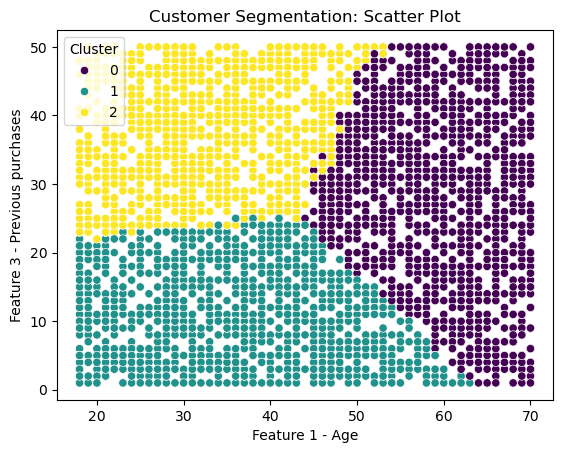

In [219]:

sns.scatterplot(x=df['Age'], y=df['Previous Purchases'], hue=df['Cluster'], palette='viridis')

# Adding labels and title
plt.title('Customer Segmentation: Scatter Plot')
plt.xlabel('Feature 1 - Age')
plt.ylabel('Feature 3 - Previous purchases')

# Show the plot
plt.show()

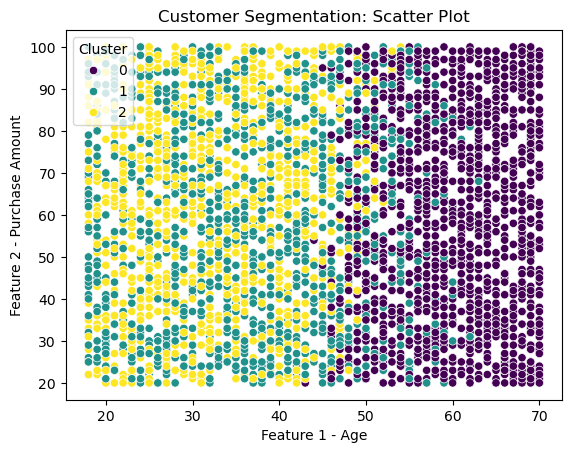

In [220]:

sns.scatterplot(x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster'], palette='viridis')

# Adding labels and title
plt.title('Customer Segmentation: Scatter Plot')
plt.xlabel('Feature 1 - Age')
plt.ylabel('Feature 2 - Purchase Amount')

# Show the plot
plt.show()

## Observations and Recommendations

- During the customer segmentation analysis done, there were 3 clusters identified, based on age and the number of previous purchases within the time period:
  - Cluster 0 - Older, moderately frequent buyers
  - Cluster 1 - Mid-aged, least frequncy buyers
  - Cluster 2 - Younger, frequnect buyers


- Based on the clusters, it is recommended to, 

  - Offer personalized product recommendations for Cluster 2, as these frequent buyers could appreciate such a service. 
  - Create targeted campaigns to offer discounts for Cluster 1 as they are less frequent buyers.